In [1]:
import matplotlib.pyplot as plt

from microlensing.IPM.ipm import IPM

By default, all of the microlenses have mass 1, and the Einstein radius $\theta_★$ (theta_star) of a unit mass microlens is 1. 

I.e., the magnification map is in units of the microlens Einstein radius. 

In [2]:
ipm = IPM(verbose=0, 
          kappa_tot=0.4, shear=0.4, kappa_star=0.4, 
          half_length_y1=25, half_length_y2=25, 
          num_pixels_y1=5000, num_pixels_y2=5000
          )
ipm.run()

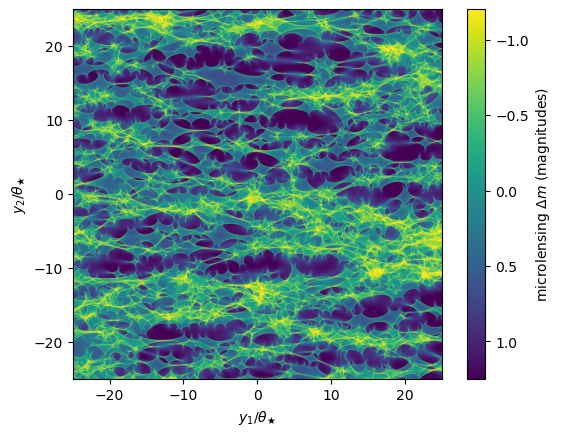

In [3]:
fig, ax = plt.subplots()
ipm.plot(ax)
plt.show()

`ipm.pixel_scales` returns a tuple; in this example a single pixel is 0.01 by 0.01 Einstein radii. You have to convert that to whatever physical units that might mean for your problem

In [4]:
ipm.pixel_scales

(0.01, 0.01)

Suppose instead I want to work in units of arcseconds, and simulate a 25 x 25 microarcsecond map. I can then also dictate the size of the Einstein radius of my unit mass stars in arcseconds; let's say $\theta_★=2.3$ microarcseconds for this example.

In [5]:
ipm = IPM(verbose=0, 
          kappa_tot=0.4, shear=0.4, kappa_star=0.4,
          half_length_y1=25*10**-6, half_length_y2=25*10**-6,
          num_pixels_y1=5000, num_pixels_y2=5000,
          theta_star=2.3*10**-6,
          )
ipm.run()

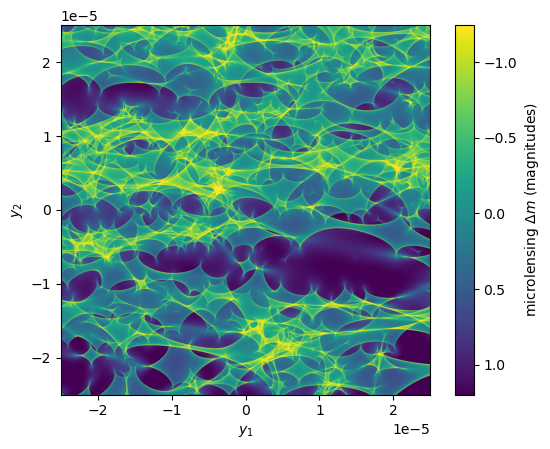

In [6]:
fig, ax = plt.subplots()
ipm.plot(ax)
plt.show()

Notice the change in axes scales in the plot above compared to the first one, as well as the absence of $\theta_★$ in the axes labels to help suggest that we are working in some other units. The caustics are also larger because we have used a larger value of theta_star (relative to the half_length) for a unit mass microlens.

In this case, we can see that the pixel scale is 10 nanoarcseconds.

In [7]:
ipm.pixel_scales

(9.999999747378752e-09, 9.999999747378752e-09)

If you want to use a spectrum of microlens masses, you can add a few parameters.

In this case, m_lower and m_upper are in units of *solar* mass (as that is how the turnover points in the IMF slopes are typically defined). By default, m_solar=1. This means that a *unit* mass microlens is $1M_\odot$ (and has $\theta_★=2.3$ microarcseconds in this example).

In [8]:
ipm = IPM(verbose=1, 
          kappa_tot=0.4, shear=0.4, kappa_star=0.4,
          half_length_y1=25*10**-6, half_length_y2=25*10**-6,
          num_pixels_y1=5000, num_pixels_y2=5000,
          theta_star=2.3*10**-6,
          mass_function='kroupa', m_lower=0.08, m_upper=100
          )
ipm.run()

Generating star field...
Done generating star field. Elapsed time: 0.002 seconds.

Creating children and sorting stars...
Done creating children and sorting stars. Elapsed time: 0.098 seconds.

Calculating multipole and local coefficients...
Done calculating multipole and local coefficients. Elapsed time: 0.107 seconds.

Shooting cells...
100 %
Done shooting cells. Elapsed time: 9.019 seconds.



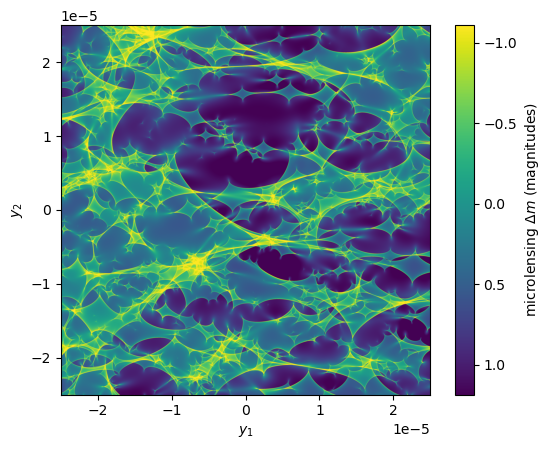

In [9]:
fig, ax = plt.subplots()
ipm.plot(ax)
plt.show()

Of course one need not work in units of solar mass. Maybe (for whatever odd reason) we want our unit mass to be $4M_\odot$, in which case we need to set m_solar=0.25 in those units. Keeping $\theta_★=2.3\cdot10^{-6}$ now implies that the Einstein radius of a 4 solar mass star is 2.3 microarcseconds.

In [10]:
ipm = IPM(verbose=1, 
          kappa_tot=0.4, shear=0.4, kappa_star=0.4,
          half_length_y1=25*10**-6, half_length_y2=25*10**-6,
          num_pixels_y1=5000, num_pixels_y2=5000,
          theta_star=2.3*10**-6,
          mass_function='kroupa', m_lower=0.08, m_upper=100,
          m_solar=0.25
          )
ipm.run()

Generating star field...
Done generating star field. Elapsed time: 0.002 seconds.

Creating children and sorting stars...
Done creating children and sorting stars. Elapsed time: 0.111 seconds.

Calculating multipole and local coefficients...
Done calculating multipole and local coefficients. Elapsed time: 0.128 seconds.

Shooting cells...
100 %
Done shooting cells. Elapsed time: 4.174 seconds.



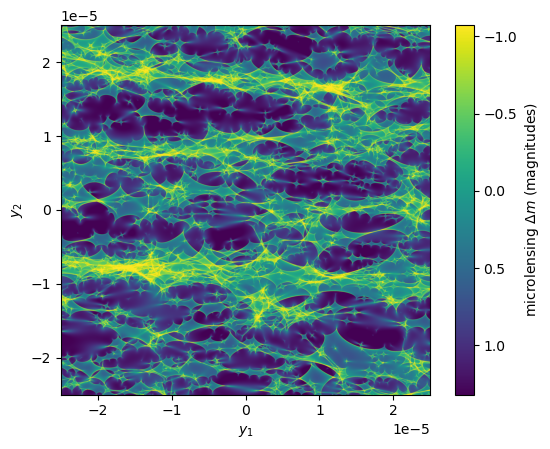

In [11]:
fig, ax = plt.subplots()
ipm.plot(ax)
plt.show()

One could, in theory, also work in even more physical units such as kilograms. This does pose some issues though, as the value of $\langle m^2\rangle$ (required in some calculations) is of order $10^{60}$ kg, greater than the maximum float value that can be stored ($\sim10^{38}$). There is a double precision library which can be used, but it will run slower. 

In [12]:
ipm = IPM(verbose=2, 
          kappa_tot=0.4, shear=0.4, kappa_star=0.4,
          half_length_y1=25*10**-6, half_length_y2=25*10**-6,
          num_pixels_y1=5000, num_pixels_y2=5000,
          theta_star=2.3*10**-21,
          mass_function='kroupa', m_lower=0.08, m_upper=100,
          m_solar=1.988*10**30,
          is_double=True)
ipm.run()

m_lower set to: 1.5904e+29
m_upper set to: 1.988e+32
mean_mass set to: 1.14084e+30
mean_mass2 set to: 1.76689e+61
mean_mass2_ln_mass set to: 1.29036e+63
mu_ave set to: 5
num_rays_x set to: 1e+16
ray_half_sep set to: (5e-09, 5e-09)
half_length_x set to: (0.00020603, 0.00103015)
num_ray_threads set to: (41206, 206030)
center_x set to: (0, 0)
num_stars set to: 137295
corner set to: (0.000282261, 0.00141131)
alpha_error set to: 5e-10

Generating star field...
random_seed set to: -120190228
Done generating star field. Elapsed time: 0.002 seconds.

kappa_star_actual set to: 0.396976
m_lower_actual set to: 1.59045e+29
m_upper_actual set to: 1.98127e+32
mean_mass_actual set to: 1.13222e+30
mean_mass2_actual set to: 1.6822e+61
mean_mass2_ln_mass_actual set to: 1.22795e+63
corner set to: (0.000281192, 0.00140596)

root_half_length set to: 0.00157719

Creating children and sorting stars...
tree_levels set to: 9
Done creating children and sorting stars. Elapsed time: 0.104 seconds.

expansion_orde

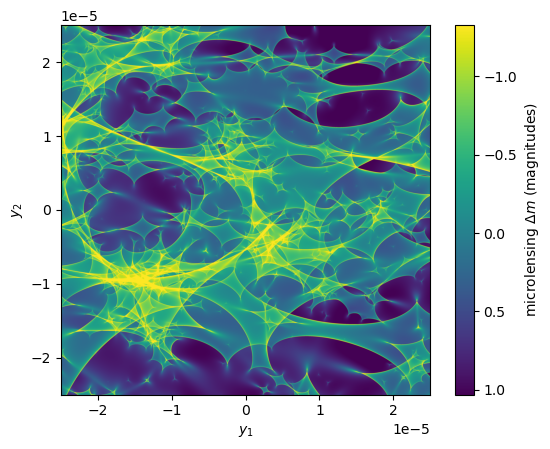

In [13]:
fig, ax = plt.subplots()
ipm.plot(ax)
plt.show()